# Human Cell Lines Preprocessing

In [1]:
# import mazebox as mb
import scvelo as scv
import scanpy as sc
import os.path as op
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
import dropkick as dk
# make sure to use position 1
sys.path.insert(1, "/Users/smgroves/Documents/GitHub/Groves-CellSys2021/")
import mazebox as mb
import cellrank as cr
import scanorama

## Read in Files

In [30]:
indir = "../../../data/single-cell-rna-seq/Human-tumors/"

samples = ['236D_236D_V300044428','3359-PK-1-GCCAAT-ATCAGT_S1_L001']
[a1,a2] = [mb.pp.read_loom(sample, indir) for sample in samples]


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/anndata/utils.py:117: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  + str(example_colliding_values)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/anndata/utils.py:117: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Ex

In [31]:
tfs = ['SP100', 'FOSL1', 'HES1', 'NFKBIZ', 'RELB', 'EPAS1', 'BCL3', 'REST', 'SP110', 'NFKB2', 'TEAD2', 'HMG20B', 'SIX5',
       'RARG', 'TEAD4', 'ZNF217', 'SP140L', 'SOX18', 'HOXC13', 'STAT6', 'ETV4', 'KLF2', 'MITF', 'NR0B2', 'ASCL1', 'ZBTB7C', 'ELF3',
       'RORC', 'FOXA2', 'ETS2','TOX3', 'XBP1', 'ST18', 'FOXA1', 'OVOL2', 'ZNF664', 'TBX10', 'PROX1', 'ETV6', 'CEBPD', 'TFCP2L1', 'FOXJ3',
       'ZNF407', 'ZNF511','ZNF396', 'RBPJ', 'ZSCAN31', 'HOXB5', 'ZNF3', 'TSHZ2', 'ZBTB16', 'ZNF10', 'FLI1', 'GATA4', 'NR0B1', 'NHLH1',
       'NEUROD6', 'ZNF581', 'TCF15', 'LYAR', 'ISL2', 'OLIG2', 'NEUROD1', 'INSM1', 'PAX5', 'SP6', 'MYT1', 'HES6', 'ZNF24', 'ISL1', 'ZNF397',
       'SOX11', 'ZNF253', 'SMAD4', 'RBP1', 'ONECUT2', 'ZNF711', 'DLX5', 'GRIP1', 'ZNF157', 'ZNF713', 'ZNF136', 'FOXN4', 'PATZ1', 'ZNF491',
       'ZBTB21', 'KLF12', 'ZNF501', 'ZNF785', 'CXXC1', 'ZNF324', 'ZNF764', 'ZBTB18', 'KAT8', 'ZNF334', 'POU4F1', 'ZNF250', 'ZNF132',
       'SALL2', 'DLX6', 'MBD1','SOX1', 'ZFP3', 'ZNF543', 'POU2F1', 'NONO', 'SMAD9', 'ZKSCAN2', 'TCF12', 'VEZF1', 'TOX', 'BHLHE22', 'MTA1',
       'TCF3', 'SCRT2', 'RFX7','NHLH2', 'SCRT1', 'RCOR2', 'PURG', 'TBPL1', 'TCF4', 'EBF1', 'ZNF749', 'NEUROD2', 'ZNF423', 'BACH2', 'GLI1',
       'ZFP64','NKX2-1', 'MYC', 'YAP1', 'POU2F3', 'MYCL', 'MYCN', 'ASCL2', 'AVIL', 'CHAT', 'GFI1B',
      'CHGA','EPCAM']


## Dropkick

How many cells in each dataset?

In [32]:
total_cells = 0
for i,a in enumerate([a1,a2]):
    print(samples[i])
    print(a.X.shape)
    total_cells += a.X.shape[0]
print("Total cells: ", total_cells)

236D_236D_V300044428
(8069, 43306)
3359-PK-1-GCCAAT-ATCAGT_S1_L001
(580, 43306)
Total cells:  8649


In [33]:
ax = a1.copy()
sc.pp.filter_cells(ax, min_genes=100)

In [34]:
ax

AnnData object with n_obs × n_vars = 4314 × 43306
    obs: 'n_genes'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

### Dropkick Model plots

Top 10 ambient genes have dropout rates between 0.426 and 24.08 percent:
	['MT-RNR2', 'MT-CO3', 'MT-ND4', 'MT-ATP6', 'MT-ND1', 'MT-CYB', 'MT-ND2', 'MT-RNR1', 'RPL7A', 'MT-CO1']
Top 10 ambient genes have dropout rates between 0.426 and 24.08 percent:
	['MT-RNR2', 'MT-CO3', 'MT-ND4', 'MT-ATP6', 'MT-ND1', 'MT-CYB', 'MT-ND2', 'MT-RNR1', 'RPL7A', 'MT-CO1']
Determining 2000 highly variable genes
Setting arcsinh_norm layer to .X
Thresholding on heuristics for training labels:
	['arcsinh_n_genes_by_counts']
Ignoring 3544 barcodes below first threshold on arcsinh_n_genes_by_counts
Training dropkick with alphas:
	[0.1]


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   26.2s remaining:   39.4s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   30.2s finished


Chosen lambda value:
	[0.09012411]
Assigning scores and labels
Done!

CPU times: user 2min 37s, sys: 17.1 s, total: 2min 55s
Wall time: 53.7 s


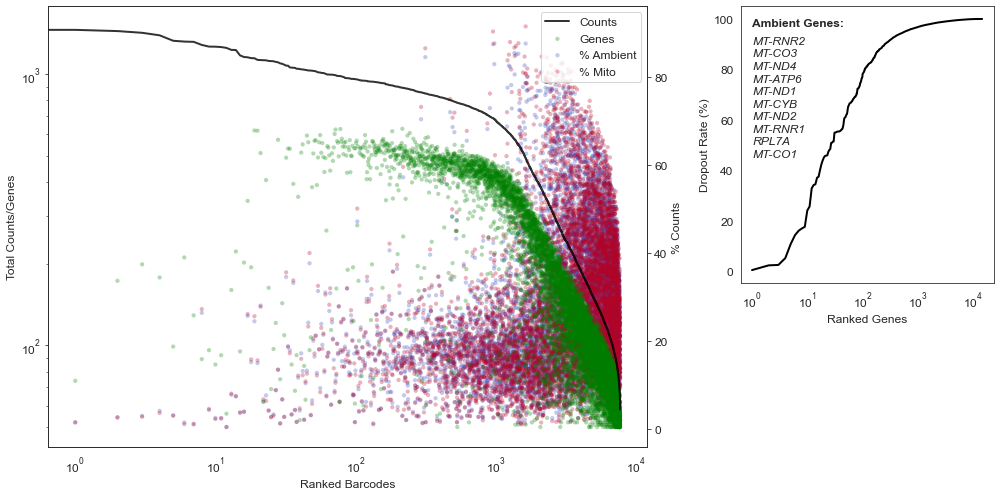

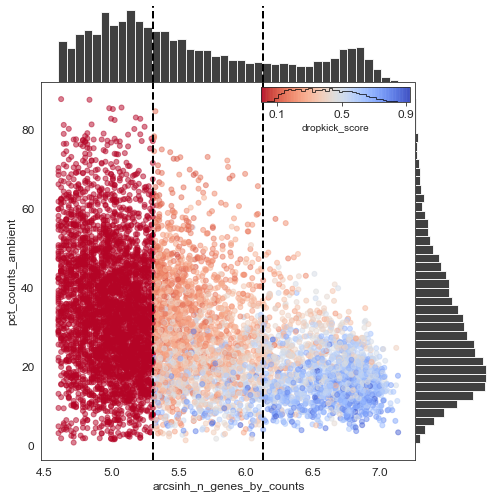

In [36]:
a1_dk = dk.recipe_dropkick(a1, n_hvgs=None, X_final="raw_counts")
qc_plt = dk.qc_summary(a1_dk)
%time adata_model = dk.dropkick(a1_dk, n_jobs=5)
dk.score_plot(a1_dk)

Ignoring 25768 genes with zero total counts
Top 10 ambient genes have dropout rates between 0.172 and 2.931 percent:
	['MT-RNR2', 'TMSB4X', 'MT-ND4', 'MT-CO3', 'MT-ATP6', 'MT-CYB', 'MT-RNR1', 'MT-CO1', 'MT-ND1', 'ACTB']
Top 10 ambient genes have dropout rates between 0.172 and 2.931 percent:
	['MT-RNR2', 'TMSB4X', 'MT-ND4', 'MT-CO3', 'MT-ATP6', 'MT-CYB', 'MT-RNR1', 'MT-ND1', 'MT-CO1', 'ACTB']
Determining 2000 highly variable genes
Setting arcsinh_norm layer to .X
Thresholding on heuristics for training labels:
	['arcsinh_n_genes_by_counts']
Ignoring 137 barcodes below first threshold on arcsinh_n_genes_by_counts
Training dropkick with alphas:
	[0.1]


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    3.2s remaining:    4.8s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    3.5s finished


Chosen lambda value:
	[0.20494806]
Assigning scores and labels
Done!

CPU times: user 10.3 s, sys: 5.67 s, total: 15.9 s
Wall time: 5.12 s


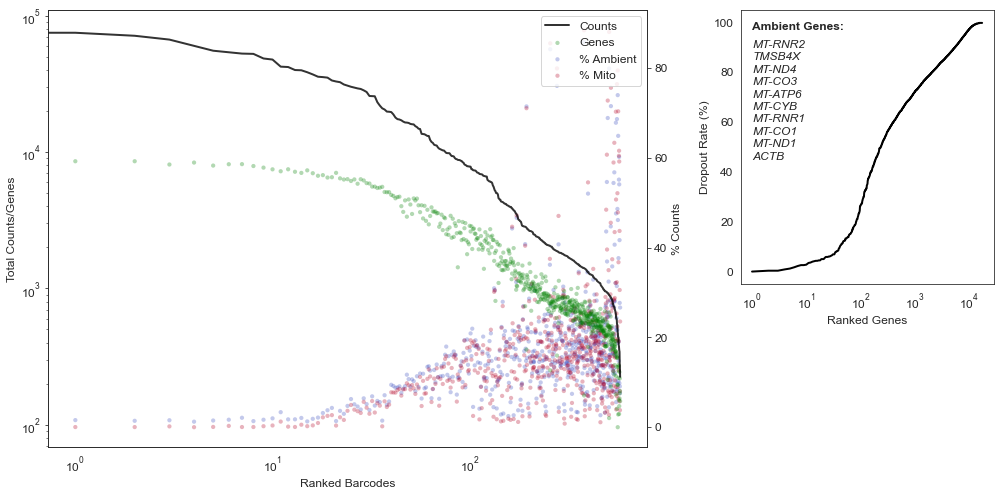

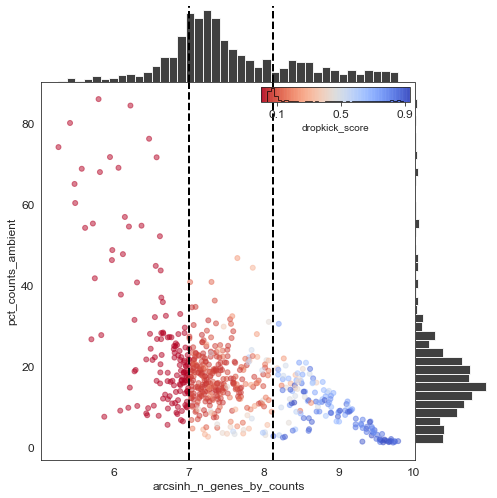

In [37]:
a2_dk = dk.recipe_dropkick(a2, n_hvgs=None, X_final="raw_counts")
qc_plt = dk.qc_summary(a2_dk)
%time adata_model = dk.dropkick(a2_dk, n_jobs=5)
dk.score_plot(a2_dk)

In [38]:
batch_categories = ['Tumor 1','Tumor 2']
batch_key = 'tumor'

adatas = [a1,a2]


adata = mb.pp.dropkick_recipe(adatas, verbose=False, filter=False, batch_categories = batch_categories, batch_key = batch_key,
                                                X_final = 'log1p_norm',plot = False, n_hvgs=None,
                                                retain_genes=tfs)


Running dropkick on each sample and filtering...
Chosen lambda value:
	[0.09012411]
Assigning scores and labels
Done!

Chosen lambda value:
	[0.20494806]
Assigning scores and labels
Done!

AnnData object with n_obs × n_vars = 8321 × 13295
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'tumor'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'mito', 'pct_dropout_by_counts-Tumor 1', 'ambient-Tumor 1', 'dropkick_coef-Tumor 1', 'pct_dropout_by_counts-Tumor 2', 'ambient-Tumor 2', 'dropkick_coef-Tumor 2'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'raw_counts'
Filtering and normalizing concatenated data...
Filtered out 337 genes that are detected 3 counts (spliced).
AnnData object with n_obs × n_vars = 4863 × 12958
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'tumor', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'mito', 'pct_dro

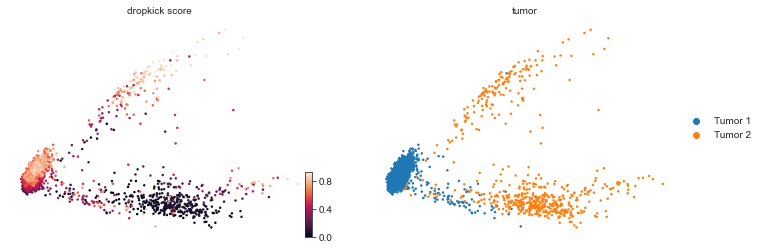

In [40]:
scv.pl.pca(adata, color = ['dropkick_score','tumor'], legend_loc = 'on right')

In [41]:
scv.pp.neighbors(adata, random_state=0)
scv.tl.umap(adata, random_state=0)

computing neighbors
    finished (0:00:05) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)


## Filtering out immune cells

In [34]:
sc.tl.leiden(adata, random_state=0)

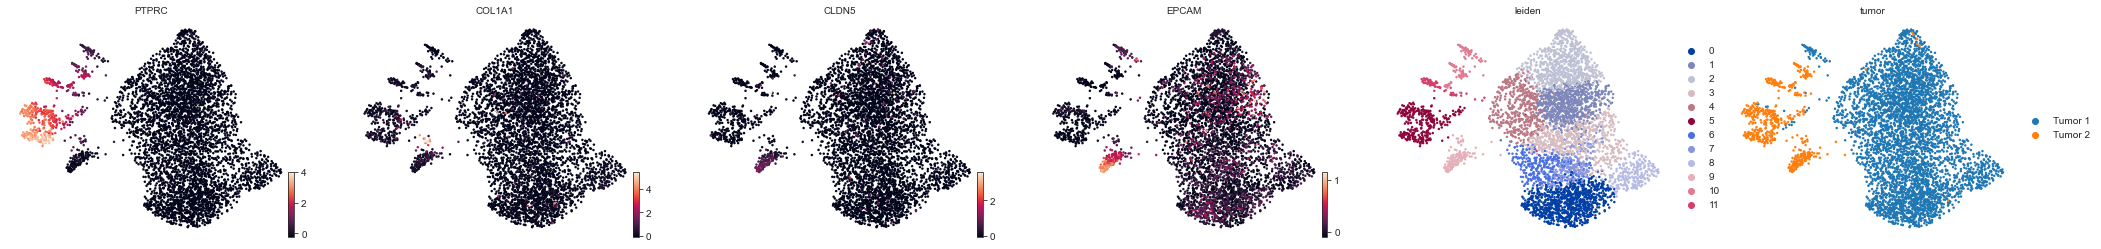

In [40]:
scv.pl.umap(adata, color = ['PTPRC','COL1A1','CLDN5','EPCAM',
                            'leiden','tumor'], legend_loc = 'on right', smooth = True)

In [85]:
adata.obs['COL1A1+'] = adata[:,'COL1A1'].X >4

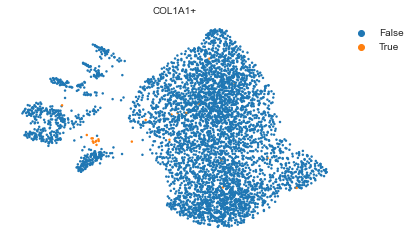

In [86]:
scv.pl.umap(adata, color = 'COL1A1+')

- Immune cells: 5, 11 (cluster 10 has EPCAM expression, so not removing)
- Fibroblasts: COL1A1 > 4
- Endothelial: Not removing any cells, since cluster 9 has some CLDN5 but higher expression of EPCAM

In [99]:
adata = adata[adata.obs['COL1A1+'] == 'False']

In [106]:
adata = adata[[ i not in ['5','11'] for i in adata.obs.leiden]]

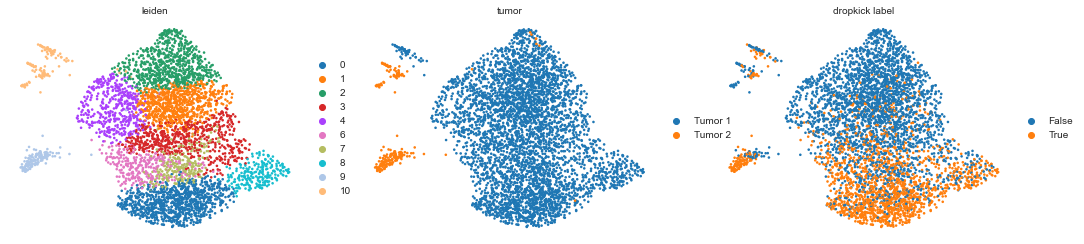

In [111]:
scv.pl.umap(adata, color = ['leiden','tumor', 'dropkick_label'], legend_loc = 'on right')

In [121]:
adata.write_h5ad('../../out/human-tumors/adata_01.h5ad')

In my dropkick recipe, setting filter = False will add the dropkick labels/scores to adata but does not actually filter any cells or genes. It **will** filter cells and genes based on scanpy's and scvelo's functions:
`sc.pp.filter_cells(adata, min_genes=min_genes);
scv.pp.filter_genes(adata, min_counts=min_counts, retain_genes=retain_genes)`


In [2]:
adata = sc.read_h5ad('../../out/human-tumors/adata_01.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 4485 × 15344
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'tumor', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase', 'leiden', 'PTPRC+', 'COL1A1+'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef-Tumor 1', 'dropkick_coef-Tumor 2', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std'
    uns: 'COL1A1+_colors', 'PTPRC+_colors', 'dropkick_label_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'tumor_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'arcsinh_nor

In [4]:
adata_dk = adata[adata.obs.dropkick_label=='True'].copy() #if this throws an error or gives 0 cells, try ==1 or == True

In [5]:
scv.pp.pca(adata_dk, random_state=0)

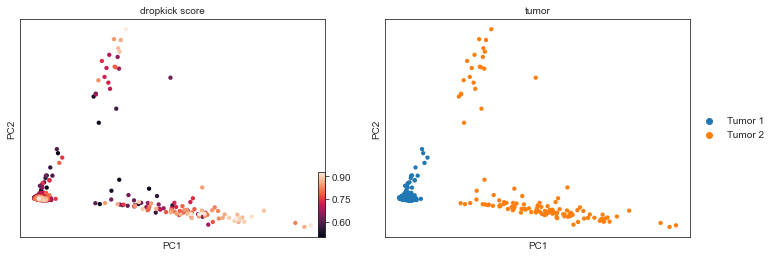

In [36]:
scv.pl.pca(adata_dk, color = ['dropkick_score','tumor'], legend_loc = 'on right', frameon=True)


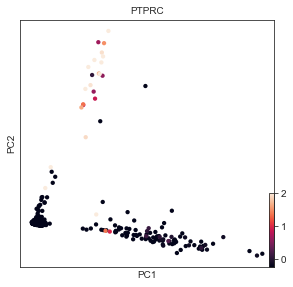

In [37]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(222)
scv.pl.pca(adata_dk, color = ['PTPRC'], legend_loc = 'on right', frameon=True, vmax = 2, show = False, ax = ax)
ax.axes.xaxis.set_visible(True)
ax.axes.get_yaxis().set_visible(True)
plt.show()


The top cluster is clearly still enriched for PTPRC, so I will remove this as well before moving forward.

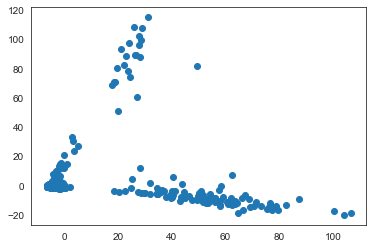

In [39]:
plt.scatter(adata_dk.obsm['X_pca'][:,0],adata_dk.obsm['X_pca'][:,1])

In [44]:
adata_dk.obs['pca_cutoff'] = adata_dk.obsm['X_pca'][:,1]>40

In [52]:
adata_dk = adata_dk[adata_dk.obsm['X_pca'][:,1]<=40]

In [53]:
scv.pp.pca(adata_dk, random_state=0)

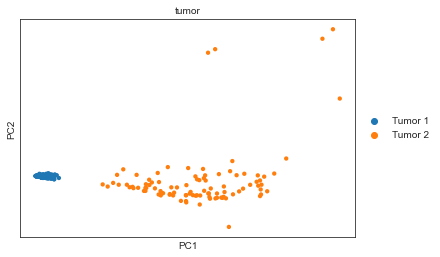

In [54]:
scv.pl.pca(adata_dk, color = ['tumor'], legend_loc = 'on right', frameon=True)


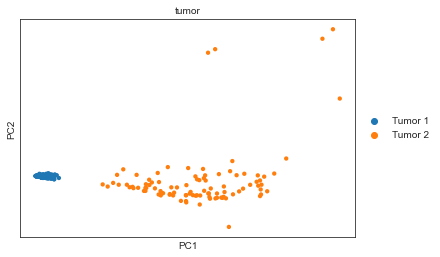

In [76]:
scv.pl.pca(adata_dk, color = ['tumor'],components='1,2', legend_loc = 'on right', frameon=True)


In [55]:
scv.pp.neighbors(adata_dk, random_state=0)
scv.tl.umap(adata_dk, random_state=0)

computing neighbors
    finished (0:00:11) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)


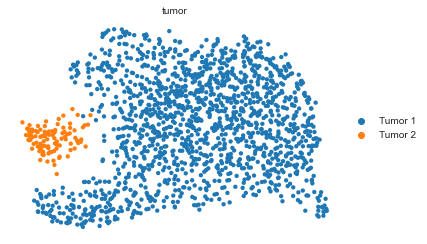

In [56]:
scv.pl.umap(adata_dk, color = ['tumor'], legend_loc = 'on right')

In [57]:
adata_dk.write_h5ad('../../out/human-tumors/adata_dk_01_update.h5ad')

In [ ]:
adata

AnnData object with n_obs × n_vars = 4485 × 15344
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'tumor', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase', 'leiden', 'PTPRC+', 'COL1A1+', 'M', 'E', 'clusters_gradients', 'cell_cycle_diff'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef-Tumor 1', 'dropkick_coef-Tumor 2', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std'
    uns: 'pca', 'tumor_colors', 'neighbors', 'umap', 'dropkick_label_colors', 'leiden', 'leiden_colors', 'PTPRC+_colors', 'COL1A1+_colors', 'clusters_gradients_colors', 

In [58]:
adata_dk

AnnData object with n_obs × n_vars = 1596 × 15344
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'tumor', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase', 'leiden', 'PTPRC+', 'COL1A1+', 'pca_cutoff'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef-Tumor 1', 'dropkick_coef-Tumor 2', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std'
    uns: 'COL1A1+_colors', 'PTPRC+_colors', 'dropkick_label_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'tumor_colors', 'umap', 'pca_cutoff_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
  

## Doublet detection

Given a raw (unnormalized) UMI counts matrix counts_matrix with cells as rows and genes as columns, calculate a doublet score for each cell:

```import scrublet as scr
scrub = scr.Scrublet(counts_matrix)
doublet_scores, predicted_doublets = scrub.scrub_doublets()
scr.scrub_doublets() simulates doublets from the observed data and uses a k-nearest-neighbor classifier to calculate a continuous doublet_score (between 0 and 1) for each transcriptome. The score is automatically thresholded to generate predicted_doublets, a boolean array that is True for predicted doublets and False otherwise.
```
Best practices:
- When working with data from multiple samples, run Scrublet on each sample separately. Because Scrublet is designed to detect technical doublets formed by the random co-encapsulation of two cells, it may perform poorly on merged datasets where the cell type proportions are not representative of any single sample.
- Check that the doublet score threshold is reasonable (in an ideal case, separating the two peaks of a bimodal simulated doublet score histogram, as in this example), and adjust manually if necessary.
- Visualize the doublet predictions in a 2-D embedding (e.g., UMAP or t-SNE). Predicted doublets should mostly co-localize (possibly in multiple clusters). If they do not, you may need to adjust the doublet score threshold, or change the pre-processing parameters to better resolve the cell states present in your data.


In [77]:
for a in [a1,a2]:
    mb.pp.doublet_detections(a, layer = 'matrix')

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.40
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 0.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 27.3%
Elapsed time: 6.8 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.46
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 2.9%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 17.6%
Elapsed time: 0.4 seconds


In [96]:
(a1.obs.predicted_doublets == True).sum()

6

In [97]:
(a2.obs.predicted_doublets == True).sum()

3

## EMT Signature

In [59]:
adata = sc.read_h5ad('../../out/human-tumors/adata_dk_01_update.h5ad')

In [60]:
emt = pd.read_csv('../../../data/single-cell-rna-seq/Lung EMT signature.csv', header = 0, index_col = 0)


In [61]:
sc.tl.score_genes(adata, gene_list=emt.loc[emt['Group']=='M'].index, score_name='M')
sc.tl.score_genes(adata, gene_list=emt.loc[emt['Group']=='E'].index, score_name='E')

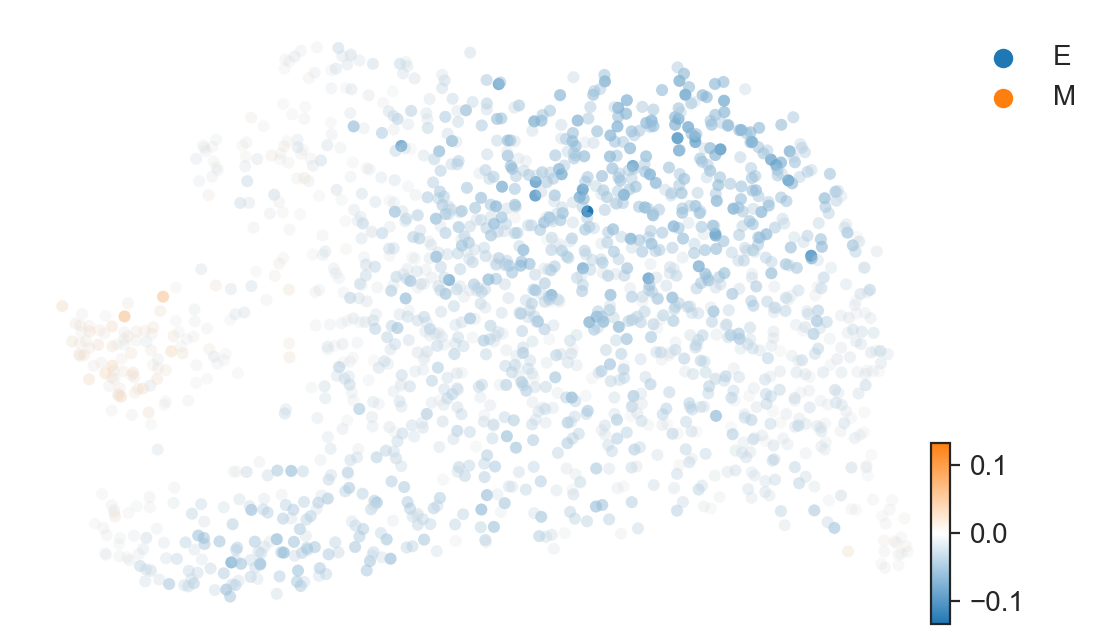

In [62]:
scv.pl.umap(adata, color_gradients=['E','M'], smooth = True, perc = [5,95], dpi = 200, colorbar = True)


## Cell cycle regression 

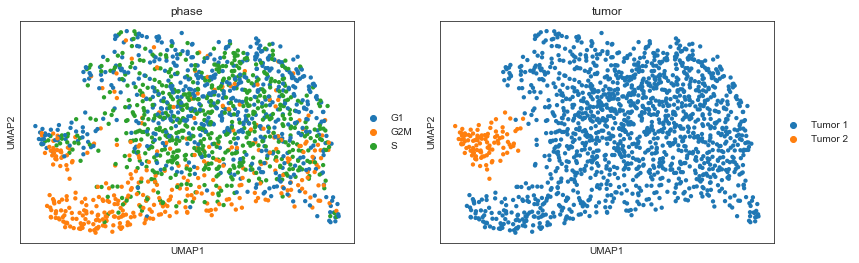

In [63]:
# dropkick recipe already scores cell cycle genes
sc.pl.umap(adata, color=['phase','tumor'])

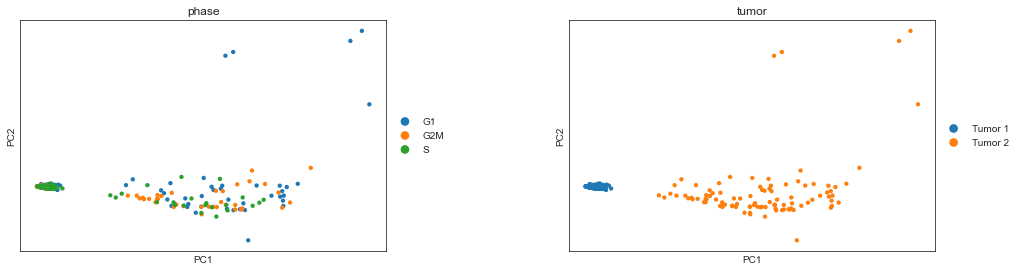

In [64]:
sc.pl.scatter(adata, color=['phase','tumor'], basis = 'pca')

In [65]:
adata.obs["cell_cycle_diff"] = adata.obs["S_score"] - adata.obs["G2M_score"]


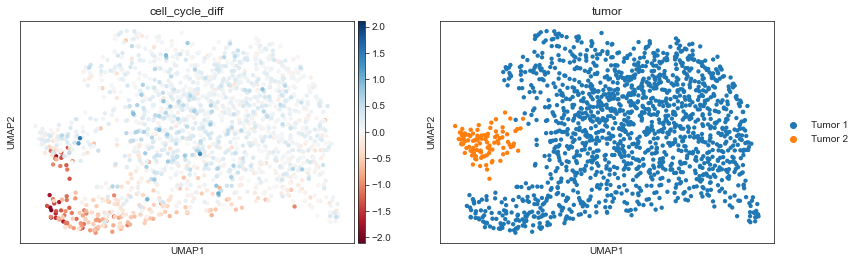

In [66]:
from matplotlib.colors import CenteredNorm 
sc.pl.umap(adata, color=['cell_cycle_diff', 'tumor'], cmap = 'RdBu', norm=CenteredNorm(0))

In [21]:
# sc.pp.regress_out(adata, ['S_score', 'G2M_score'])
# sc.pp.scale(adata)

In [24]:
# sc.pp.neighbors(adata, random_state=0)
# sc.tl.leiden(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


## Saving

Because we filtered out the dropkick cells after filtering cells and genes with scanpy, we need to doublecheck that all of the genes are actually expressed in the dataset, so we'll do a small filter to get rid of any genes we missed.

In [68]:
sc.pp.filter_genes(adata, min_cells=3)

In [69]:
adata

AnnData object with n_obs × n_vars = 1596 × 13593
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'tumor', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase', 'leiden', 'PTPRC+', 'COL1A1+', 'pca_cutoff', 'M', 'E', 'clusters_gradients', 'cell_cycle_diff'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef-Tumor 1', 'dropkick_coef-Tumor 2', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std', 'n_cells'
    uns: 'COL1A1+_colors', 'PTPRC+_colors', 'dropkick_label_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'pca_cutoff_colors', 'tumor_

In [70]:
adata.write_h5ad('../../out/human-tumors/adata_dk_01_update.h5ad')